# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [2]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


C:\Users\nammr\anaconda3\envs\pj21\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [3]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 32
y_size = 128
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 300001
batch = 16

In [4]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             3309568   
_________________________________________________________________
batch_normalization (BatchNo (None, 32768)             131072    
_________________________________________________________________
reshape (Reshape)            (None, 8, 32, 128)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 64, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 16, 64, 64)        0

In [5]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 64, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 128)        204928    
_________________________________________________________________
activation_2 (Activation)    (None, 8, 32, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 32, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)            

In [6]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                  
dis_output = discriminator(generator(ginput))          
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 32, 128, 1)        3647361   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 239361    
Total params: 3,886,722
Trainable params: 3,581,697
Non-trainable params: 305,025
_________________________________________________________________


In [6]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2331, 128, 32)


28, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128,

(2331, 128, 32)

In [ ]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size

  # 데이터 불러오기
  print(x_train.shape)  # (2331, 128, 32)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  scale = MaxAbsScaler()
  X_train = scale.fit_transform(X_train)

  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 32, 128, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):

    idx = np.random.randint(0, X_train.shape[0], batch_size)    
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)


    noise = np.random.normal(0, 1, (batch_size, nosie_size))   
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 
    g_loss = gan.train_on_batch(noise, true)        
    print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            # idx2 = np.random.randint(0, gen_imgs.shape[0])
            idx2 = 5    # 출력 값 고정
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 32, 128, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (862,128))
            # gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            # print(gen_mels.shape) # (862, 128)
            # gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan15\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
            

gan_train(epochs, batch, 500)


end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

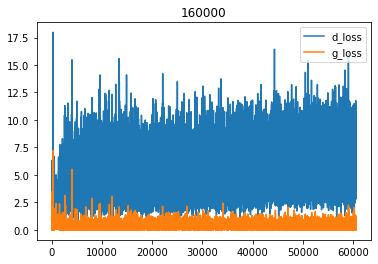

In [27]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv')
# print(loss_csv)
# print(loss_csv.shape)
plt.plot(loss_csv['g_loss'])
plt.plot(loss_csv['d_loss'])
plt.legend(['d_loss', 'g_loss'], loc='upper right')
plt.title(160000)
plt.show()

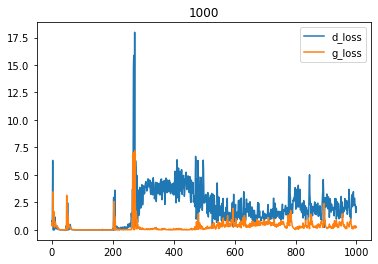

In [28]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv')
# print(loss_csv)
# print(loss_csv.shape)
loss_csv = loss_csv[:1000]
plt.plot(loss_csv['g_loss'])
plt.plot(loss_csv['d_loss'])
plt.legend(['d_loss', 'g_loss'], loc='upper right')
plt.title(1000)
plt.show()

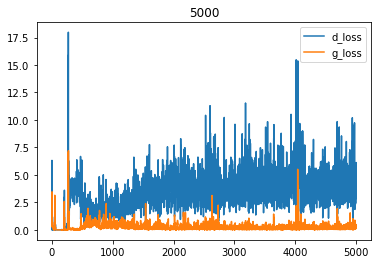

In [29]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv')
# print(loss_csv)
# print(loss_csv.shape)
loss_csv = loss_csv[:5000]
plt.plot(loss_csv['g_loss'])
plt.plot(loss_csv['d_loss'])
plt.legend(['d_loss', 'g_loss'], loc='upper right')
plt.title(5000)
plt.show()

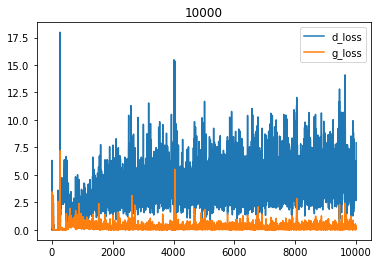

In [30]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv')
# print(loss_csv)
# print(loss_csv.shape)
loss_csv = loss_csv[:10000]
plt.plot(loss_csv['g_loss'])
plt.plot(loss_csv['d_loss'])
plt.legend(['d_loss', 'g_loss'], loc='upper right')
plt.title(10000)
plt.show()